See original notebook : https://colab.research.google.com/drive/1hp14O7a8KYpW2e-hZOncjGeAgWJiv9Kk

# Restricted Boltzmann Machine

The aim of this project is to construct a Restricted Boltzmann Machine with Constraint-Divergence 1 algorithm

![picture](https://drive.google.com/uc?export=view&id=1cfSpd35npnSvmQcsPUY8FLT096Y8JIGs)

# Imports

In [6]:
import numpy as np
import sys
from scipy.io.matlab import mio
import matplotlib.pyplot as plt
import random

# Datasets

The datasets considered in this project are the following :
- Binary Alpha Digits, which contains binary images of size 20*16 representing numbers from 0 to 9 and upper letters from A to Z.
- MNIST which contains 8-bits images in shades of grey of size 28*28 representing numbers from 0 to 9
- USPS which contains 8-bits images in shades of grey of size 16*16 representing numbers from 0 to 9

In [ ]:
!wget https://cs.nyu.edu/~roweis/data/mnist_all.mat
!wget https://cs.nyu.edu/~roweis/data/usps_all.mat
!wget https://cs.nyu.edu/~roweis/data/binaryalphadigs.mat

# Class definition

In [3]:
class RBM:
    """Random Boltzman Machine"""
    def __init__(self, input_size: int, output_size: int):
        self.W = 0.01*np.random.randn(input_size,output_size)
        self.a = np.zeros((1,input_size))
        self.b = np.zeros((1,output_size))
        self.p = input_size
        self.q = output_size

    def input_output(self, v):
        # size = (v.shape[0],self.q)
        return sigmoid(v@self.W + self.b)

    def output_input(self,h):
        # size = (h.shape[0],self.p)
        return sigmoid(h@self.W.T + self.a)

    def train(self, x, epochs: int=5000, lr: float =1e-1, minibatchsize: int = 10):
        """
        Training of the Restricted Boltzmann Machine on data x
        """
        for epoch in range(epochs):
            # shuffle data
            np.random.shuffle(x)
            n = x.shape[0] - data.shape[0]%minibatchsize # for n to be a multiple of minibatchsize
            for batch in range(0,n,minibatchsize):
                data_batch = x[batch:batch+minibatchsize,:].copy()
                v0 = data_batch.copy()
                proba_h0 = self.input_output(v0)
                # random sample of the output, obtained from the data, following a Bernouilli distribution
                h0 = (np.random.rand(minibatchsize,self.q) < proba_h0).astype(int)
                proba_v1 = self.output_input(h0)
                v1 = (np.random.rand(minibatchsize,self.p) < proba_v1).astype(int)
                proba_h1 = self.input_output(v1)
                # compute the loss function
                L = np.sum(np.power(v0-v1,2))/minibatchsize
                # starting update
                # averaging the update over the whole minibatch
                dL_W = (data_batch.T@proba_h0-v1.T@proba_h1)/minibatchsize
                dL_a = np.ones(shape=(1,minibatchsize))@(v0-v1)/minibatchsize
                dL_b = np.ones(shape=(1,minibatchsize))@(proba_h0-proba_h1)/minibatchsize
                self.W+=lr*dL_W
                self.a+=lr*dL_a
                self.b+=lr*dL_b
            if epoch%10==0:
                print("  Loss : %f  |  epoch %d/%d" %(L, epoch+1,epochs))

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def generate_image(RBM_instance, iter_gibbs, nb_img):
    """
    Generate an image from a Restricted Boltzmann Machine instance using a Gibbs sampler
    """
    d=np.zeros((width,1))
    space=np.zeros((width,1))#separate the generated images with a blank column
    for i in range(nb_img):
        plt.figure()
        v = (np.random.rand(RBM_instance.p) < 0.5)*1
        for j in range(iter_gibbs):
            h = (np.random.rand(RBM_instance.q) < RBM_instance.input_output(v))*1
            v = (np.random.rand(RBM_instance.p) < RBM_instance.output_input(h))*1
        
        v=v.reshape(width,height)
        d=np.concatenate((d,v),axis=1)
        d=np.concatenate((d,space),axis=1)
    plt.imshow(d)


def read_alpha_digits(caractères):
    """
    Read data from dataset and flatten the samples
    """
    matrice = []
    for caractère in caractères:
        for example in fichier['dat'][caractère]:
            matrice.append(example.reshape(width*height)) # Reshape with size 20*16
    return np.array(matrice)


def read_mnist(caractères):
    """
    Read data from dataset and flatten the samples
    """
    matrice, samples = [], []
    for caractère in caractères:
        for example in fichier['train'+str(caractère)]:
            example = (example > 255/2)*1  # Binarization of data
            samples.append(example.reshape(28*28)) # Reshape with size 28*28
        samples = random.sample(samples, 250) # Selecting only 250 samples for a better computation time
        matrice += samples
    return np.array(matrice)


def read_usps(caractères):
    """
    Read data from dataset and flatten the samples
    """
    matrice, samples = [], []
    data = np.swapaxes(fichier['data'], 0, 2)
    for caractère in caractères:
        for example in data[caractère]:
            example = (example > 255/2)*1  # Binarization of data
            samples.append(example.reshape(16*16))  # Reshape with size 16*16
        samples = random.sample(samples, 250) # Selecting only 250 samples for a better computation time
        matrice += samples
    return np.array(matrice)

def loss(v,v1):
    return np.sum(np.power((v-v1),2))

# Main

In [4]:
# Dataset selection
dataset = 'mnist' # 'usps' 'binaryalphadigits'

  Loss : 87.500000  |  epoch 1/5000
  Loss : 46.100000  |  epoch 11/5000
  Loss : 31.500000  |  epoch 21/5000
  Loss : 34.800000  |  epoch 31/5000
  Loss : 27.500000  |  epoch 41/5000
  Loss : 15.100000  |  epoch 51/5000
  Loss : 34.700000  |  epoch 61/5000
  Loss : 25.800000  |  epoch 71/5000
  Loss : 15.800000  |  epoch 81/5000
  Loss : 16.200000  |  epoch 91/5000
  Loss : 16.200000  |  epoch 101/5000
  Loss : 12.400000  |  epoch 111/5000
  Loss : 13.200000  |  epoch 121/5000
  Loss : 15.600000  |  epoch 131/5000
  Loss : 9.600000  |  epoch 141/5000
  Loss : 11.700000  |  epoch 151/5000
  Loss : 9.900000  |  epoch 161/5000
  Loss : 10.400000  |  epoch 171/5000
  Loss : 10.600000  |  epoch 181/5000
  Loss : 13.800000  |  epoch 191/5000
  Loss : 11.900000  |  epoch 201/5000
  Loss : 11.400000  |  epoch 211/5000
  Loss : 7.000000  |  epoch 221/5000
  Loss : 7.600000  |  epoch 231/5000
  Loss : 7.700000  |  epoch 241/5000
  Loss : 5.100000  |  epoch 251/5000
  Loss : 9.600000  |  epoch 2

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

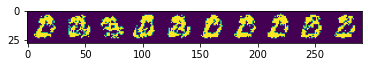

In [ ]:
if __name__ == "__main__":

    if dataset == "binaryalphadigs":
        width, height = 20, 16
        fichier = mio.loadmat("./binaryalphadigs")
        data=read_alpha_digits([10,11,12,13,14])
        h=RBM(320,200) # RBM of size 320 = 20*16
        h.train(data)

    elif dataset == "mnist":
        width, height = 28, 28
        fichier = mio.loadmat("./mnist_all")
        data=read_mnist([0,1,2])
        h=RBM(784,200) # RBM of size 784 = 28*28
        h.train(data)

    elif dataset == "usps":
        width, height = 16, 16
        fichier = mio.loadmat("./usps_all")
        data=read_usps([2,3,4,5,6])
        h=RBM(256,200) # RBM of size 256 = 16*16
        h.train(data)
    
    generate_image(h,5000,10)

    #pick a random sample and verify the loss between the sample and the reconstructed image
    #i=random.randint(0,data.shape[0])

    #character=data[i]
    #reconstructed_char=h.output_input(h.input_output(character))
    #print(loss(character,reconstructed_char))
    #character=character.reshape(width,height)
    #reconstructed_char=reconstructed_char.reshape(width,height)
    #plt.figure()
    #plt.imshow(np.concatenate((character,reconstructed_char),axis=1))
    #plt.show()

## Conclusions for Binary Alpha Digits

The reconstruction error diminishes with the growing number of hidden units. A high number enables the algorithm to a better recognition of patterns. Here are the results for Binary Alpha Digits dataset. 

| Number of hidden units| Reconstruction error  |
|-----------------------|-----------------------|
|                10     |               44.80   |
|               100     |               0.014   |
|              1000     |             0.00014   |

We obtain a reconstruction of the image with a high quality for $400$ hidden units.

## The datasets MNIST and USPS

Those datasets are both 8-bit images in shades of grey representing numbers between 0 and 9. As the MNIST dataset contains $7000$ samples by class and USPS contains $1100$ samples by class, we randomly select $250$ samples for each dataset MNIST and USPS 

## Conclusions for MNIST

The training for MNIST dataset has a higher computational time than the trainings over the two other datasets. This can be explained by the difference in the dimension of the input layer, which is greater for MNIST dataset.
Those dimensions are respectively $28*28 = 784$ for MNIST, $20*16 = 320$ for Binary Alpha Digits and $16*16=256$ for USPS. Therefore, we reduce the number of epochs for the training, which requires several minutes for MNIST dataset but few seconds for Binary Alpha Digits dataset.

We fail to reach the same quality of reconstruction than the one obtained with previous dataset, even if we rise the number of hidden units to $1000$. We suceed to obtain a satisfactory result.

## Conclusions for USPS

The learning is fast but the reconstruction of the dataset fails, even if we rise the number of hidden units to $1000$

# Conclusions

The learning on Restricted Boltzmann Machines is faster than the training on a fully-connected neural network, it enables to reconstruct images faster. However, we have also seen that the performances are not satisfactory enough. For a simple dataset often use to test performances of a learning algorithm such as MNIST, the algorithm fails to reconstruct the images. Also, the Restricted Boltzmann Machine needs an important number of hidden units, where a single layer of a variational autoencoder is capable of the same results.


Restricted Boltzmann Machines are less used in companies because other models performs better, such as feed-forward networks like variational autoencoders or generative adversarial networks. Some industries continue to use those algorithms as they succeed to show high performances, like in vocal recognition.